In [1]:
from pyspark.sql import SQLContext
import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
YELP_BUSINESSES = 'yelp_business.csv'

In [3]:
rdd = sc.textFile(YELP_BUSINESSES, use_unicode=False).cache()

In [4]:
rdd.take(10)

['business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories',
 'FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.3306902,-111.9785992,4.0,22,1,Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists',
 'He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",,"""3101 Washington Rd""",McMurray,PA,15317,40.2916853,-80.1048999,3.0,11,1,Hair Stylists;Hair Salons;Men\'s Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas',
 'KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.5249025,-112.1153098,1.5,18,1,Departments of Motor Vehicles;Public Services & Government',
 '8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.3831468,-111.9647254,3.0,9,0,Sporting Goods;Shopping',
 'PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",,"""581 Howe Ave"""

In [5]:
def parseCSV(idx, part):
    import csv
    if idx==0:
        part.next()
    for p in csv.reader(part):
        flag = True
        try:
            float(p[8])
            float(p[7])
        except ValueError:
            flag = False
            print "cant conver to float"
        if(flag):
            City,State,longitude,latitude = p[4],p[5],float(p[8]),float(p[7])
            yield City,State,longitude,latitude        

In [6]:
location_rdd = rdd.mapPartitionsWithIndex(parseCSV)

In [7]:
type(location_rdd)

pyspark.rdd.PipelinedRDD

In [8]:
location_rdd.take(1)

[('Ahwatukee', 'AZ', -111.9785992, 33.3306902)]

In [9]:
locations = location_rdd.toDF()

In [10]:
locations.show(4)

+---------+---+------------+----------+
|       _1| _2|          _3|        _4|
+---------+---+------------+----------+
|Ahwatukee| AZ|-111.9785992|33.3306902|
| McMurray| PA| -80.1048999|40.2916853|
|  Phoenix| AZ|-112.1153098|33.5249025|
|    Tempe| AZ|-111.9647254|33.3831468|
+---------+---+------------+----------+
only showing top 4 rows



In [11]:
locations = locations.select(locations['_1'].alias('City'),
                             locations['_2'].alias('State'),
                             locations['_3'].alias('Longitude'),
                             locations['_4'].alias('Latitude'))

Las_Vegas = locations.filter(locations.City == "Las Vegas")
Phoenix   = locations.filter(locations.City == "Phoenix")
Toronto   = locations.filter(locations.City == "Toronto")
Charlotte = locations.filter(locations.City == "Charlotte")
Stuttgart = locations.filter(locations.City == "Stuttgart")
Edinburgh = locations.filter(locations.City == "Edinburgh")

In [12]:
Charlotte.show(4)

+---------+-----+-----------+----------+
|     City|State|  Longitude|  Latitude|
+---------+-----+-----------+----------+
|Charlotte|   NC|-80.8393449|35.2216474|
|Charlotte|   NC| -80.855785| 35.220211|
|Charlotte|   NC| -80.726487| 35.147422|
|Charlotte|   NC|-80.8492598|35.1608893|
+---------+-----+-----------+----------+
only showing top 4 rows



In [13]:
Toronto.show(4)

+-------+-----+--------------+-------------+
|   City|State|     Longitude|     Latitude|
+-------+-----+--------------+-------------+
|Toronto|   ON|   -79.3993388|   43.7113993|
|Toronto|   ON|-79.4195331865|43.6398633116|
|Toronto|   ON|   -79.3269639|   43.6828673|
|Toronto|   ON|   -79.3359022|   43.6692562|
+-------+-----+--------------+-------------+
only showing top 4 rows



### Las Vegas

In [14]:
LVlong_list = Las_Vegas.select("Longitude").rdd.flatMap(lambda x: x).collect()
LVlat_list = Las_Vegas.select("Latitude").rdd.flatMap(lambda x: x).collect()

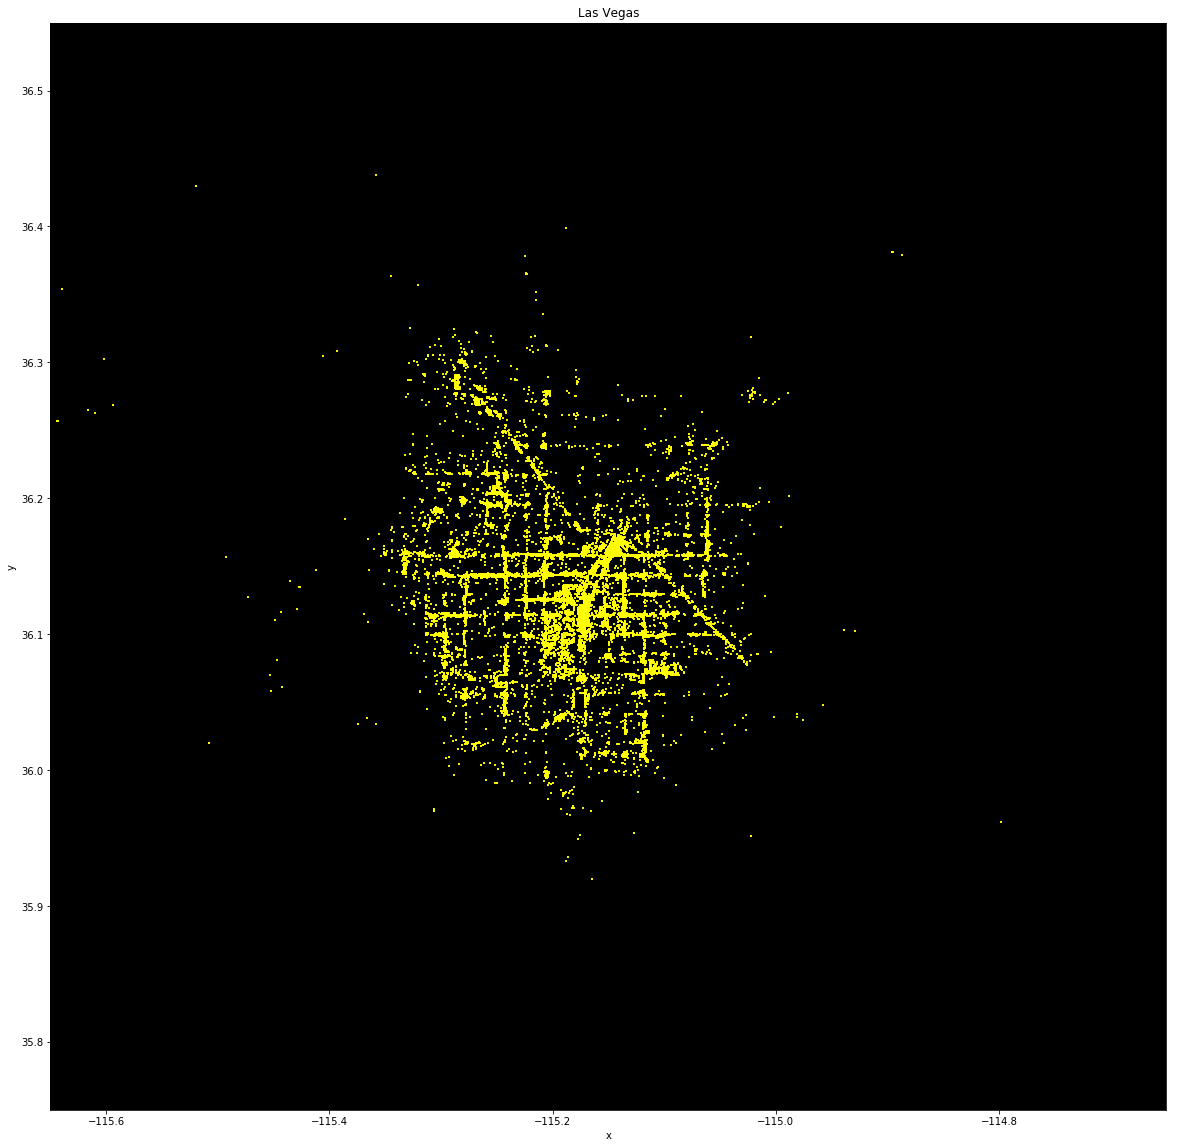

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1)

ax.scatter(LVlong_list,LVlat_list,color="yellow",alpha=1,marker='s',s=1,)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Las Vegas')
ax.set_xlim(xmin=-115.5-0.15)
ax.set_xlim(xmax=-114.8+0.15)
ax.set_ylim(ymin=35.9-0.15)
ax.set_ylim(ymax=36.4+0.15)
ax.set_facecolor("black")
plt.show()

### Phoenix

In [16]:
Plong_list = Phoenix.select("Longitude").rdd.flatMap(lambda x: x).collect()
Plat_list = Phoenix.select("Latitude").rdd.flatMap(lambda x: x).collect()

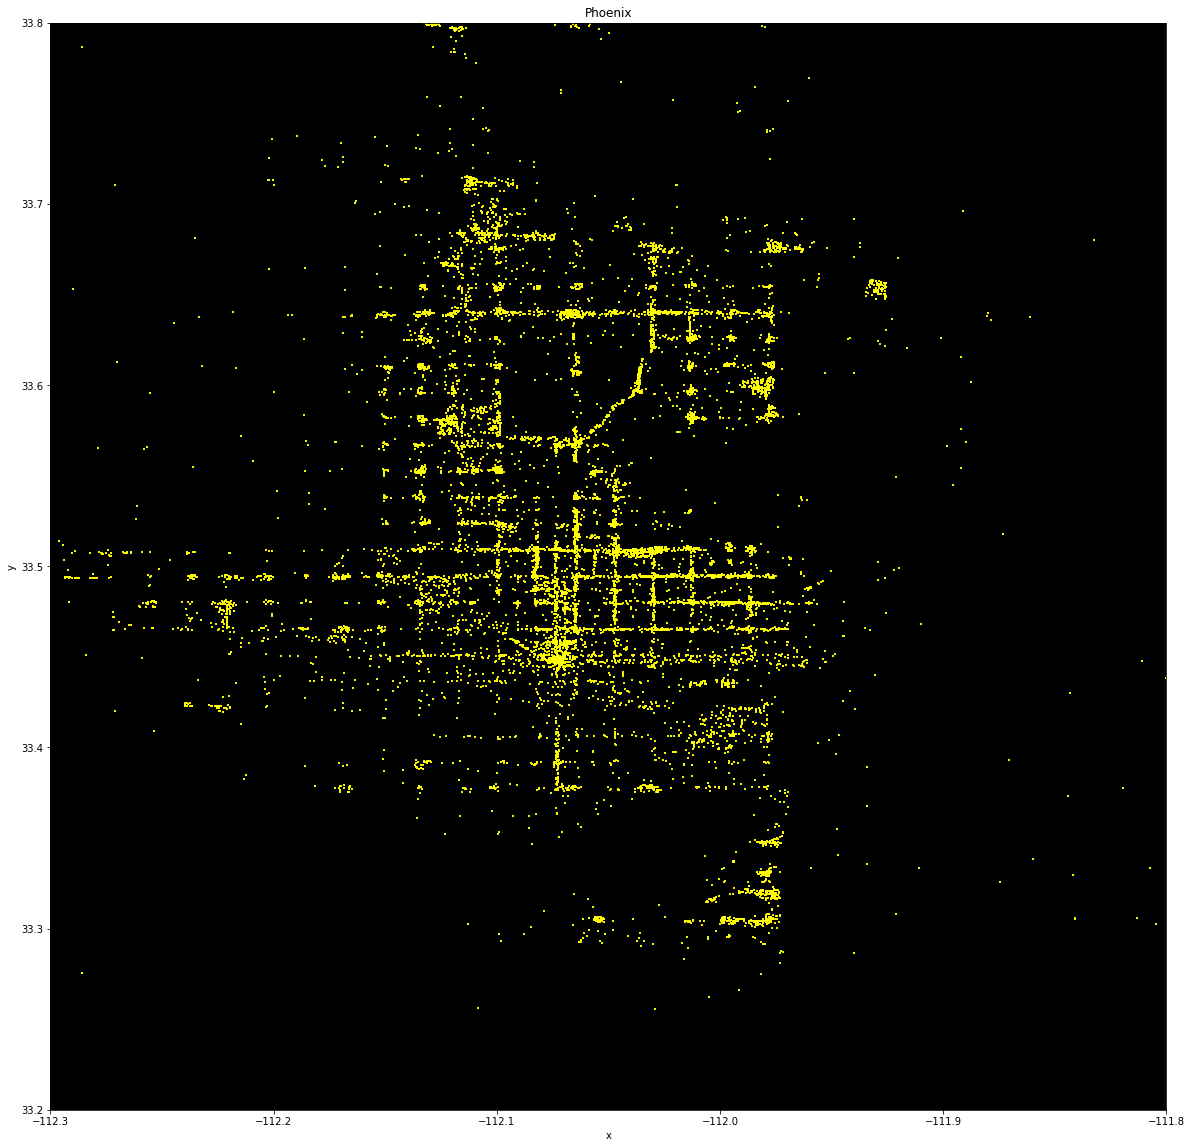

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1)

ax.scatter(Plong_list,Plat_list,color="yellow",alpha=1,marker='s',s=1,)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Phoenix')
ax.set_xlim(xmin=-112.3)
ax.set_xlim(xmax=-111.8)
ax.set_ylim(ymin=33.2)
ax.set_ylim(ymax=33.8)
ax.set_facecolor("black")
plt.show()

### Toronto

In [18]:
Tlong_list = Toronto.select("Longitude").rdd.flatMap(lambda x: x).collect()
Tlat_list = Toronto.select("Latitude").rdd.flatMap(lambda x: x).collect()

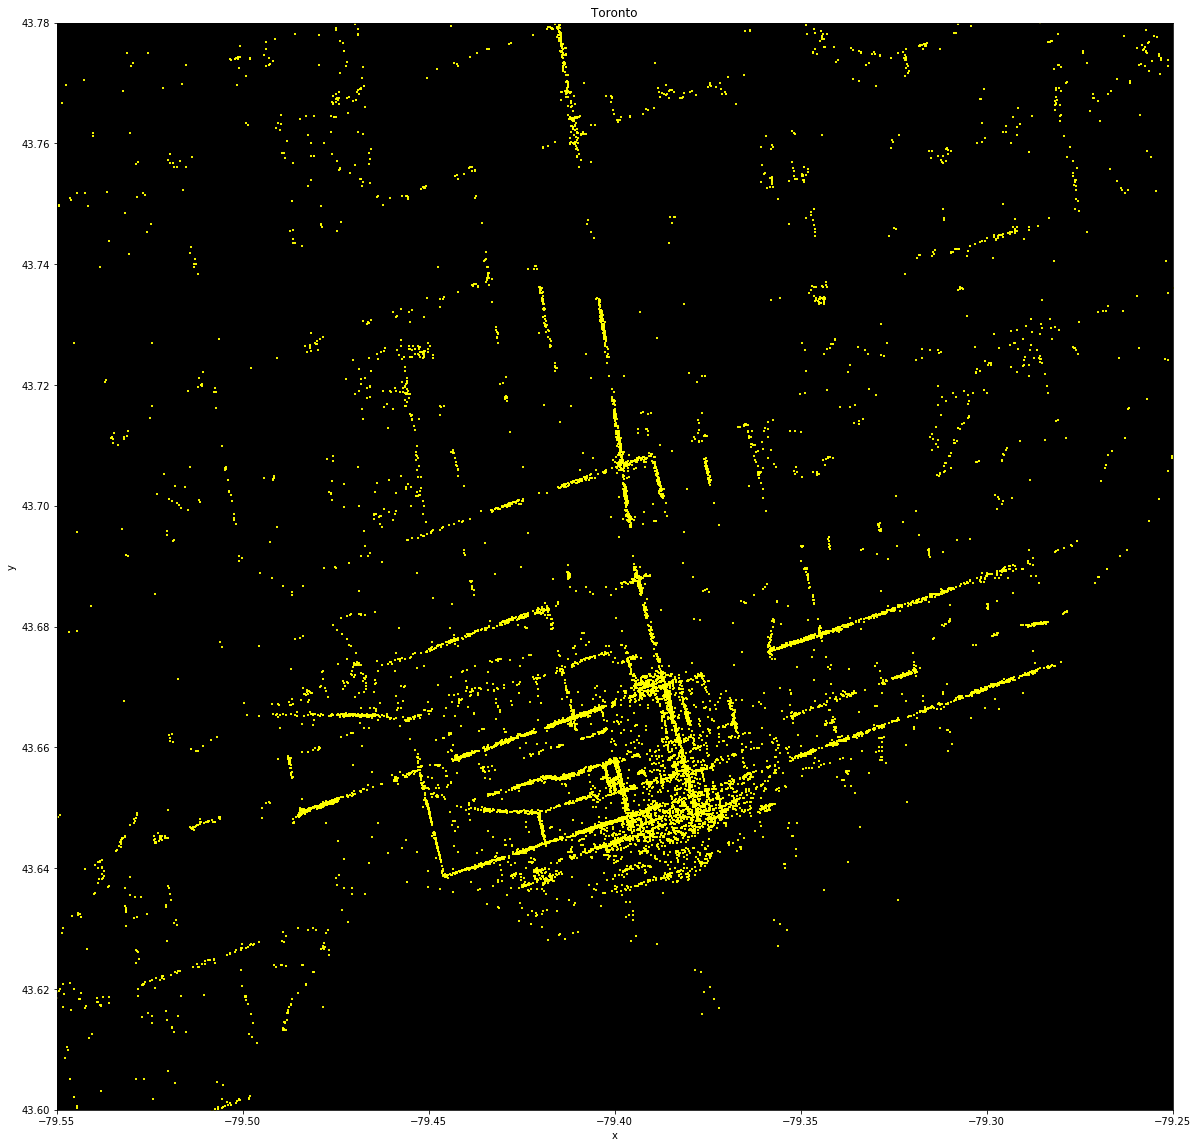

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1)

ax.scatter(Tlong_list,Tlat_list,color="yellow",alpha=1,marker='s',s=1,)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Toronto')
ax.set_xlim(xmin=-79.55) #longitude
ax.set_xlim(xmax=-79.25)
ax.set_ylim(ymin=43.6) #latitude
ax.set_ylim(ymax=43.78)
ax.set_facecolor("black")
plt.show()

### Charlotte

In [20]:
Clong_list = Charlotte.select("Longitude").rdd.flatMap(lambda x: x).collect()
Clat_list = Charlotte.select("Latitude").rdd.flatMap(lambda x: x).collect()

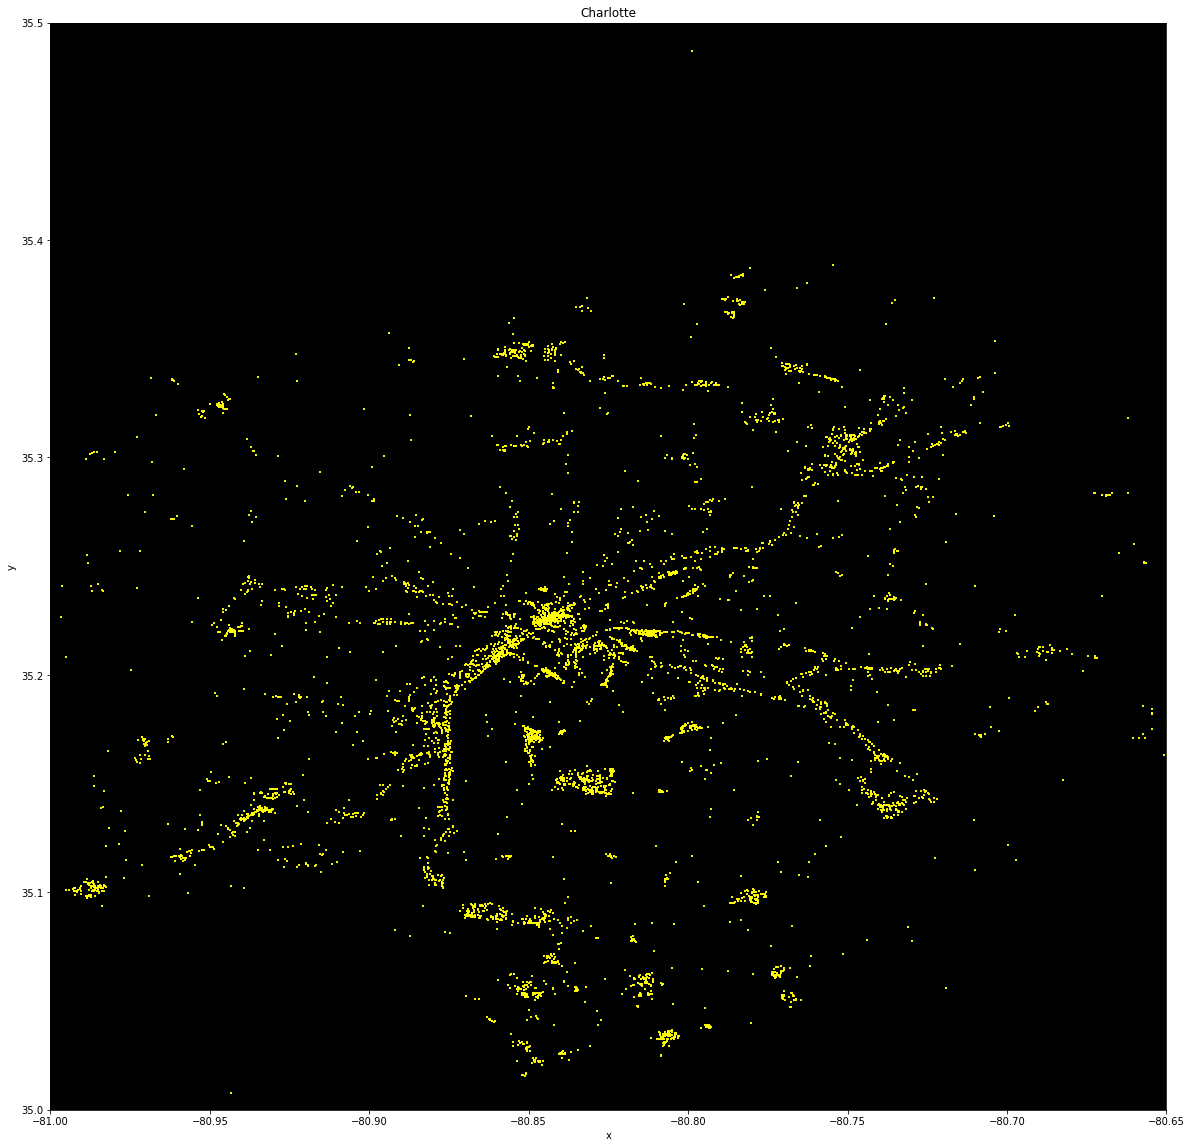

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1)

ax.scatter(Clong_list,Clat_list,color="yellow",alpha=1,marker='s',s=1,)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Charlotte')
ax.set_xlim(xmin=-81.00)
ax.set_xlim(xmax=-80.65)
ax.set_ylim(ymin=35.0)
ax.set_ylim(ymax=35.5)
ax.set_facecolor("black")
plt.show()

### Stuttgart

In [22]:
Slong_list = Stuttgart.select("Longitude").rdd.flatMap(lambda x: x).collect()
Slat_list = Stuttgart.select("Latitude").rdd.flatMap(lambda x: x).collect()

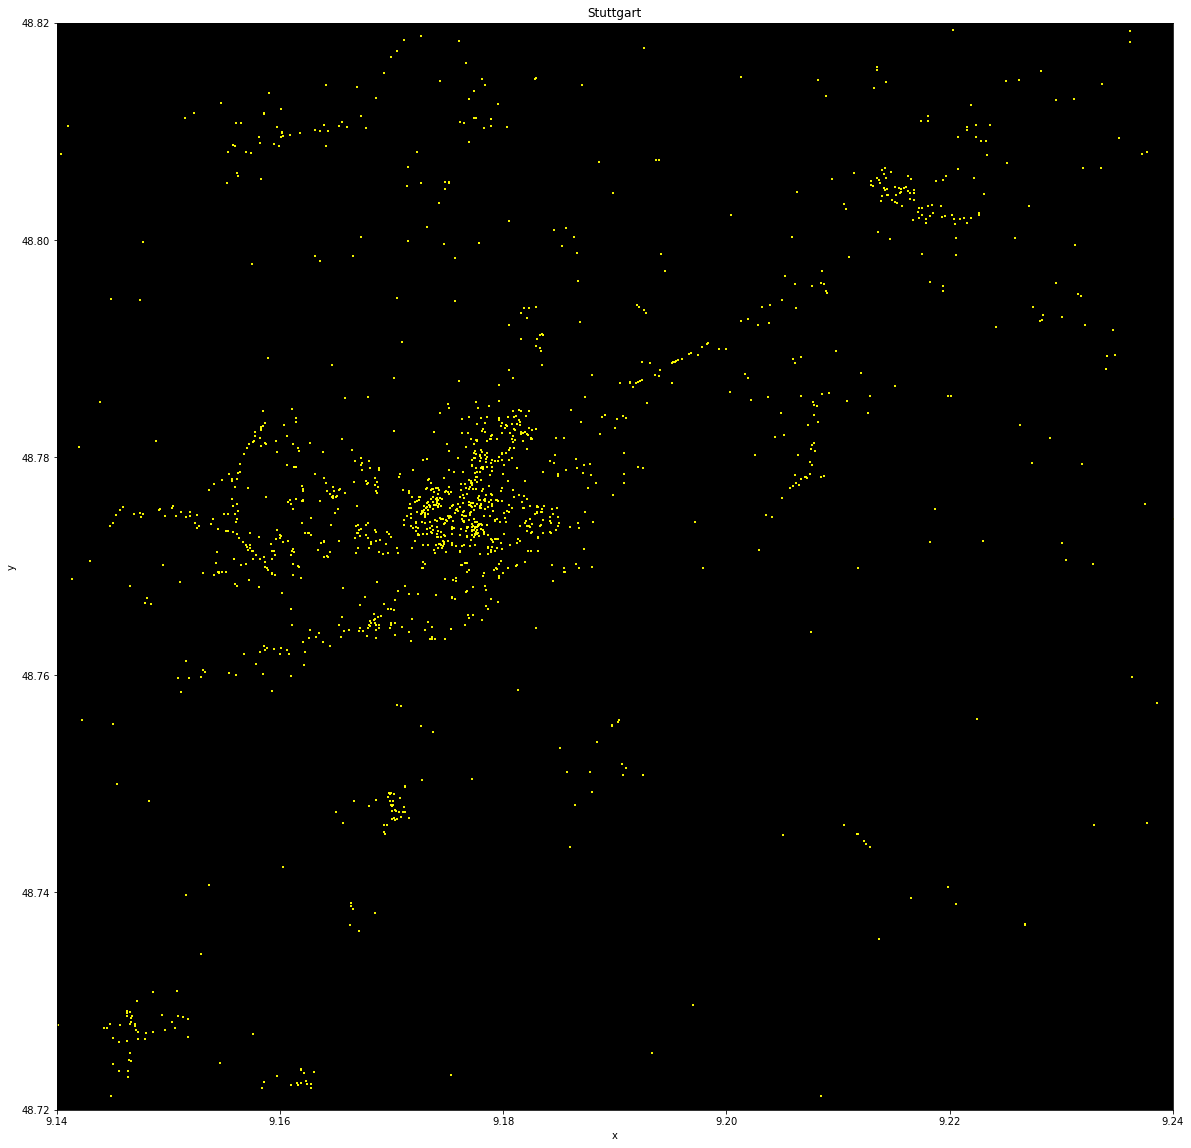

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1)

ax.scatter(Slong_list,Slat_list,color="yellow",alpha=1,marker='s',s=1,)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Stuttgart')
ax.set_xlim(xmin=9.14)
ax.set_xlim(xmax=9.24)
ax.set_ylim(ymin=48.72)
ax.set_ylim(ymax=48.82)
ax.set_facecolor("black")
plt.show()

### Edinburgh

In [24]:
Elong_list = Edinburgh.select("Longitude").rdd.flatMap(lambda x: x).collect()
Elat_list = Edinburgh.select("Latitude").rdd.flatMap(lambda x: x).collect()

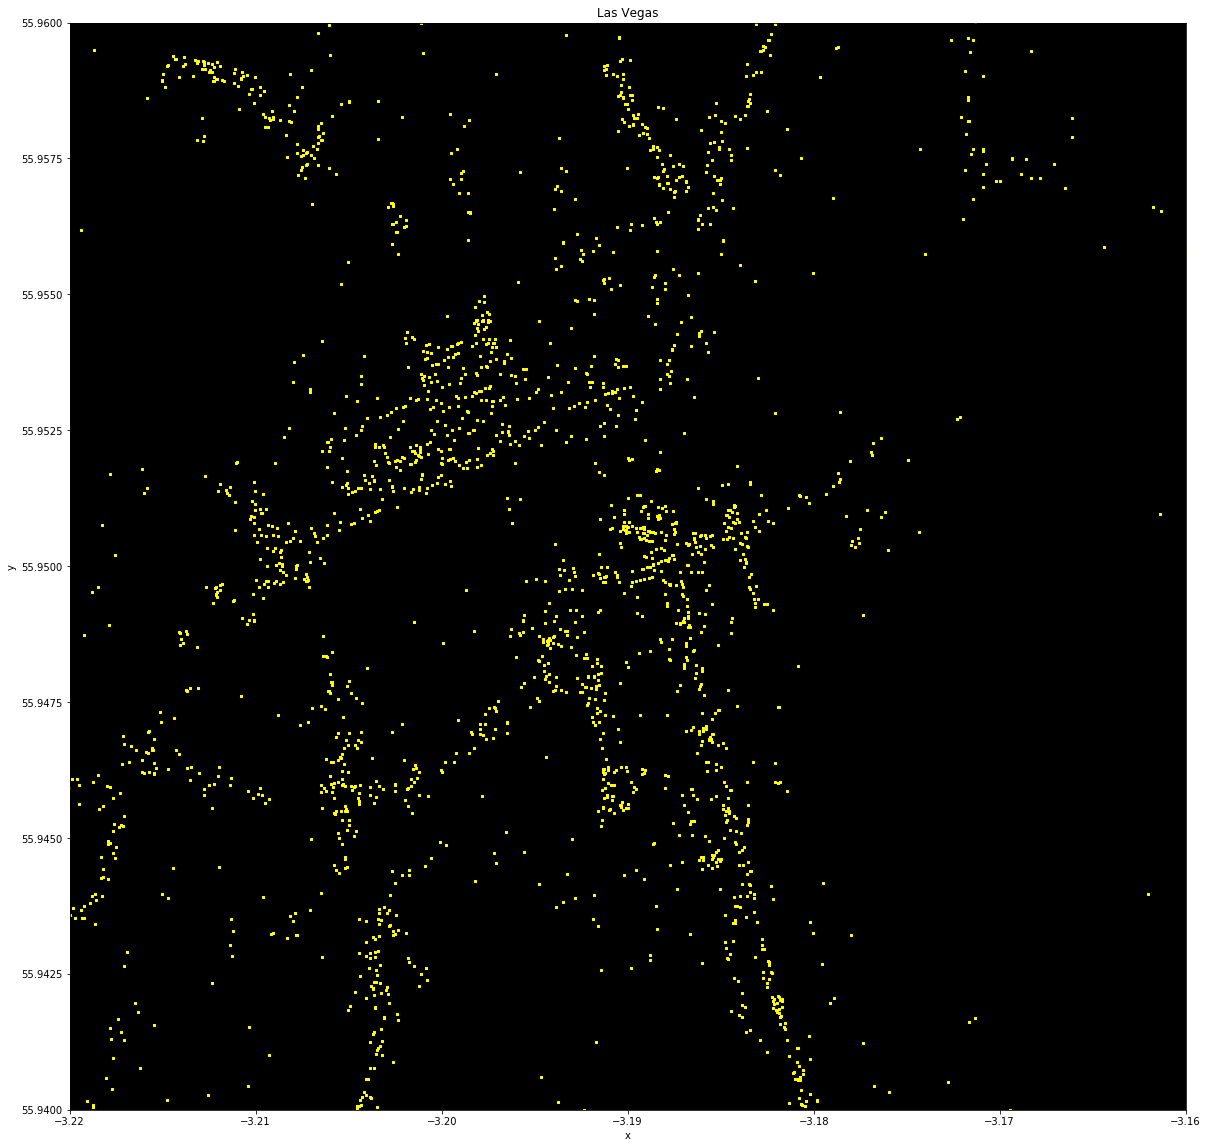

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1)

ax.scatter(Elong_list,Elat_list,color="yellow",alpha=1,marker='s',s=2,)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Las Vegas')
ax.set_xlim(xmin=-3.22)
ax.set_xlim(xmax=-3.16)
ax.set_ylim(ymin=55.940)
ax.set_ylim(ymax=55.960)
ax.set_facecolor("black")
plt.show()